In [64]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
import os
import zipfile
import requests

In [65]:
dir = r'C:\Temp\jena_dataset'
zip_file_path = os.path.join(dir, 'jena_climate_2009_2016.csv.zip')
csv_file_path = os.path.join(dir, 'jena_climate_2009_2016.csv')
os.makedirs(dir, exist_ok=True)
url = 'https://storage.googleapis.com/tensorflow/tf-keras-datasets/jena_climate_2009_2016.csv.zip'
response = requests.get(url)
with open(zip_file_path, 'wb') as f:
    f.write(response.content)

with zipfile.ZipFile(zip_file_path, 'r') as zip_ref:
    zip_ref.extractall(dir)

if os.path.exists(csv_file_path):
    df = pd.read_csv(csv_file_path)
    print(df.head())
else:
    print("File not found.")


             Date Time  p (mbar)  T (degC)  Tpot (K)  Tdew (degC)  rh (%)  \
0  01.01.2009 00:10:00    996.52     -8.02    265.40        -8.90    93.3   
1  01.01.2009 00:20:00    996.57     -8.41    265.01        -9.28    93.4   
2  01.01.2009 00:30:00    996.53     -8.51    264.91        -9.31    93.9   
3  01.01.2009 00:40:00    996.51     -8.31    265.12        -9.07    94.2   
4  01.01.2009 00:50:00    996.51     -8.27    265.15        -9.04    94.1   

   VPmax (mbar)  VPact (mbar)  VPdef (mbar)  sh (g/kg)  H2OC (mmol/mol)  \
0          3.33          3.11          0.22       1.94             3.12   
1          3.23          3.02          0.21       1.89             3.03   
2          3.21          3.01          0.20       1.88             3.02   
3          3.26          3.07          0.19       1.92             3.08   
4          3.27          3.08          0.19       1.92             3.09   

   rho (g/m**3)  wv (m/s)  max. wv (m/s)  wd (deg)  
0       1307.75      1.03        

In [66]:
df = pd.read_csv(csv_file_path)

In [67]:
df.head()

,Date Time,p (mbar),T (degC),Tpot (K),Tdew (degC),rh (%),VPmax (mbar),VPact (mbar),VPdef (mbar),sh (g/kg),H2OC (mmol/mol),rho (g/m**3),wv (m/s),max. wv (m/s),wd (deg)
0,01.01.2009 00:10:00,996.52,-8.02,265.40,-8.90,93.3,3.33,3.11,0.22,1.94,3.12,1307.75,1.03,1.75,152.3
1,01.01.2009 00:20:00,996.57,-8.41,265.01,-9.28,93.4,3.23,3.02,0.21,1.89,3.03,1309.80,0.72,1.50,136.1
2,01.01.2009 00:30:00,996.53,-8.51,264.91,-9.31,93.9,3.21,3.01,0.20,1.88,3.02,1310.24,0.19,0.63,171.6
3,01.01.2009 00:40:00,996.51,-8.31,265.12,-9.07,94.2,3.26,3.07,0.19,1.92,3.08,1309.19,0.34,0.50,198.0
4,01.01.2009 00:50:00,996.51,-8.27,265.15,-9.04,94.1,3.27,3.08,0.19,1.92,3.09,1309.00,0.32,0.63,214.3


In [68]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 420551 entries, 0 to 420550
Data columns (total 15 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   Date Time        420551 non-null  object 
 1   p (mbar)         420551 non-null  float64
 2   T (degC)         420551 non-null  float64
 3   Tpot (K)         420551 non-null  float64
 4   Tdew (degC)      420551 non-null  float64
 5   rh (%)           420551 non-null  float64
 6   VPmax (mbar)     420551 non-null  float64
 7   VPact (mbar)     420551 non-null  float64
 8   VPdef (mbar)     420551 non-null  float64
 9   sh (g/kg)        420551 non-null  float64
 10  H2OC (mmol/mol)  420551 non-null  float64
 11  rho (g/m**3)     420551 non-null  float64
 12  wv (m/s)         420551 non-null  float64
 13  max. wv (m/s)    420551 non-null  float64
 14  wd (deg)         420551 non-null  float64
dtypes: float64(14), object(1)
memory usage: 48.1+ MB


In [69]:
df = df[0::4320]
df.index = pd.to_datetime(df['Date Time'], format='%d.%m.%Y %H:%M:%S')
df=df.drop(["Date Time"],axis=1)

In [70]:
df.head()

,p (mbar),T (degC),Tpot (K),Tdew (degC),rh (%),VPmax (mbar),VPact (mbar),VPdef (mbar),sh (g/kg),H2OC (mmol/mol),rho (g/m**3),wv (m/s),max. wv (m/s),wd (deg)
Date Time,,,,,,,,,,,,,,
2009-01-01 00:10:00,996.52,-8.02,265.40,-8.90,93.3,3.33,3.11,0.22,1.94,3.12,1307.75,1.03,1.75,152.30
2009-01-31 00:10:00,997.40,-2.50,270.86,-4.01,89.3,5.08,4.54,0.54,2.83,4.55,1281.53,2.13,3.25,39.53
2009-03-02 00:10:00,984.11,3.60,278.03,2.07,89.7,7.91,7.09,0.81,4.50,7.21,1235.34,2.24,3.38,177.60
2009-04-01 00:10:00,994.63,3.05,276.64,-0.48,77.5,7.61,5.90,1.71,3.70,5.93,1251.62,0.35,0.63,118.50
2009-05-01 00:10:00,992.96,9.66,283.39,8.63,93.3,12.02,11.21,0.81,7.05,11.29,1217.85,0.70,1.13,138.80


In [71]:
df = df["T (degC)"].to_frame()

In [72]:
df

,T (degC)
Date Time,
2009-01-01 00:10:00,-8.02
2009-01-31 00:10:00,-2.50
2009-03-02 00:10:00,3.60
2009-04-01 00:10:00,3.05
2009-05-01 00:10:00,9.66
...,...
2016-08-20 10:10:00,21.81
2016-09-19 10:10:00,11.80
2016-10-19 10:10:00,8.81


<Axes: xlabel='Date Time'>

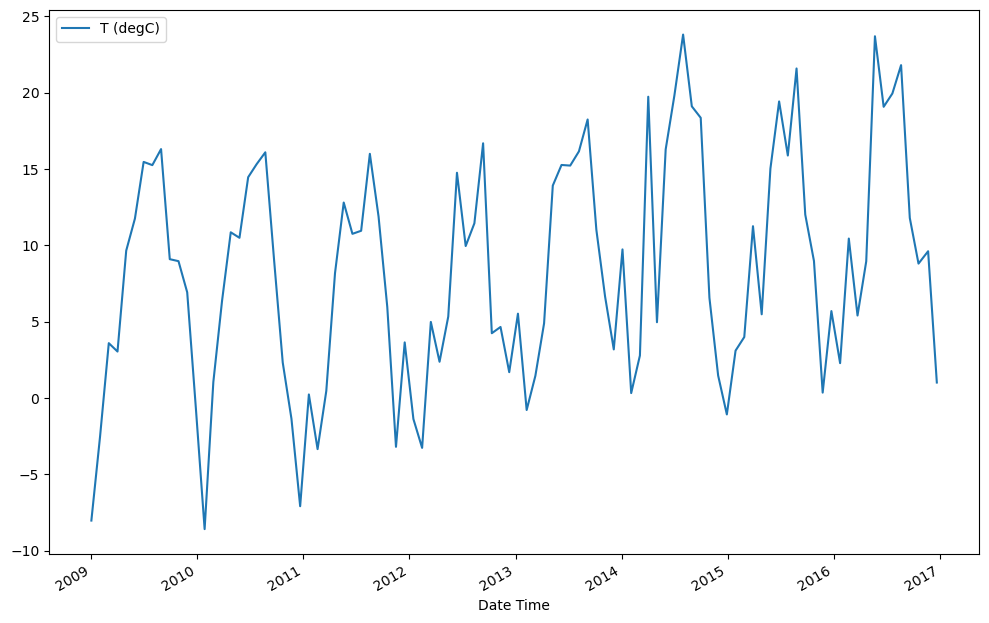

In [73]:
df.plot(figsize=(12,8))

In [74]:
len(df)

98

In [75]:
size_test = 18
test_ind = len(df)- size_test
test_ind

80

In [76]:
train = df.iloc[:test_ind]
test = df.iloc[test_ind:]

In [77]:
train

,T (degC)
Date Time,
2009-01-01 00:10:00,-8.02
2009-01-31 00:10:00,-2.50
2009-03-02 00:10:00,3.60
2009-04-01 00:10:00,3.05
2009-05-01 00:10:00,9.66
...,...
2015-02-27 10:10:00,4.00
2015-03-29 10:10:00,11.26
2015-04-28 10:10:00,5.49


In [78]:
test

,T (degC)
Date Time,
2015-07-27 10:10:00,15.89
2015-08-26 10:10:00,21.59
2015-09-25 10:10:00,12.02
2015-10-25 10:10:00,8.98
2015-11-24 10:10:00,0.36
2015-12-24 10:10:00,5.70
2016-01-23 10:10:00,2.29
2016-02-22 10:10:00,10.45
2016-03-23 10:10:00,5.41


In [79]:
from sklearn.preprocessing import MinMaxScaler

In [80]:
scaler = MinMaxScaler()
scaler.fit(train)

MinMaxScaler()

In [81]:
scaled_train = scaler.transform(train)
scaled_test = scaler.transform(test)

In [82]:
scaled_train.min()

0.0

In [83]:
from tensorflow.keras.preprocessing.sequence import TimeseriesGenerator

In [84]:
help(TimeseriesGenerator)

Help on class TimeseriesGenerator in module keras.src.legacy.preprocessing.sequence:

class TimeseriesGenerator(keras.src.trainers.data_adapters.py_dataset_adapter.PyDataset)
 |  TimeseriesGenerator(data, targets, length, sampling_rate=1, stride=1, start_index=0, end_index=None, shuffle=False, reverse=False, batch_size=128)
 |
 |  Utility class for generating batches of temporal data.
 |
 |  DEPRECATED.
 |
 |  This class takes in a sequence of data-points gathered at
 |  equal intervals, along with time series parameters such as
 |  stride, length of history, etc., to produce batches for
 |  training/validation.
 |
 |  Arguments:
 |      data: Indexable generator (such as list or Numpy array)
 |          containing consecutive data points (timesteps).
 |          The data should be at 2D, and axis 0 is expected
 |          to be the time dimension.
 |      targets: Targets corresponding to timesteps in `data`.
 |          It should have same length as `data`.
 |      length: Length of 

In [85]:
length = 12
batch_size = 1
generator = TimeseriesGenerator(data=scaled_train, targets=scaled_train, length=lenght, batch_size=batch_size)

In [86]:
X,y = generator[0]

In [87]:
print(f'Given the input array: \n{X.flatten()}')
print(f'We predict: \n{y}')

Given the input array: 
[0.01728929 0.18771226 0.37604199 0.35906144 0.56313677 0.6279716
 0.74251312 0.73602964 0.76844705 0.54584748 0.5418339  0.4788515 ]
We predict: 
[[0.24328496]]


In [88]:
from tensorflow.keras.models import Sequential
from keras.layers import LSTM, Dense, Input

In [89]:
variables = 1 

In [90]:
model = Sequential()
model.add(Input(shape=(length, variables)))
model.add(LSTM(150, activation='relu'))
model.add(Dense(variables))
model.compile(optimizer='adam', loss='mse')

In [91]:
model.summary()

Model: "sequential_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm_1 (LSTM)                        │ (None, 150)                 │          91,200 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 1)                   │             151 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 91,351 (356.84 KB)

 Trainable params: 91,351 (356.84 KB)

 Non-trainable params: 0 (0.00 B)

In [92]:
from tensorflow.keras.callbacks import EarlyStopping

In [93]:
early_stop = EarlyStopping(monitor='val_loss',patience=4)

In [94]:
generator_val = TimeseriesGenerator(scaled_test,scaled_test, length=length, batch_size=batch_size)

In [99]:
model.fit(generator,epochs=20,
                    validation_data=generator_val,
                    callbacks=[early_stop])

Epoch 1/20
68/68 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0460 - val_loss: 0.0402
Epoch 2/20
68/68 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0512 - val_loss: 0.0462
Epoch 3/20
68/68 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0464 - val_loss: 0.0397
Epoch 4/20
68/68 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0383 - val_loss: 0.0163


<Axes: >

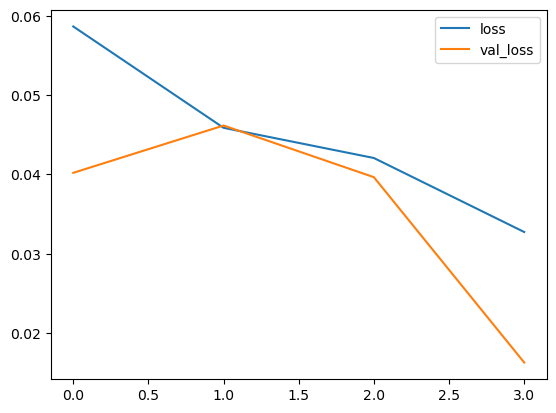

In [100]:
losses = pd.DataFrame(model.history.history)
losses.plot()

In [102]:
first_batch = scaled_train[-lenght:]
first_batch.shape

(12, 1)

In [103]:
first_batch = first_batch.reshape((1, lenght, variables))

In [104]:
first_batch.shape

(1, 12, 1)

In [105]:
model.predict(first_batch)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 189ms/step


array([[0.9111028]], dtype=float32)

In [106]:
scaled_test[0]

array([0.75548009])

In [108]:
test_predictions = []
first_batch = scaled_train[-lenght:]
actual_batch = first_batch.reshape((1, lenght, variables))
for i in range(len(test)):
    actual_pred = model.predict(actual_batch)[0]
    test_predictions.append(actual_pred)
    batch_actual = np.append(actual_batch[:,1:,:],[[actual_pred]],axis=1)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


In [109]:
test_predictions

[array([0.9111028], dtype=float32),
 array([0.9111028], dtype=float32),
 array([0.9111028], dtype=float32),
 array([0.9111028], dtype=float32),
 array([0.9111028], dtype=float32),
 array([0.9111028], dtype=float32),
 array([0.9111028], dtype=float32),
 array([0.9111028], dtype=float32),
 array([0.9111028], dtype=float32),
 array([0.9111028], dtype=float32),
 array([0.9111028], dtype=float32),
 array([0.9111028], dtype=float32),
 array([0.9111028], dtype=float32),
 array([0.9111028], dtype=float32),
 array([0.9111028], dtype=float32),
 array([0.9111028], dtype=float32),
 array([0.9111028], dtype=float32),
 array([0.9111028], dtype=float32)]

In [110]:
true_predictions = scaler.inverse_transform(test_predictions)

In [ ]:
test['Prediction'] = true_predictions

In [113]:
test

,T (degC),Prediction,Predicción
Date Time,,,
2015-07-27 10:10:00,15.89,20.930619,20.930619
2015-08-26 10:10:00,21.59,20.930619,20.930619
2015-09-25 10:10:00,12.02,20.930619,20.930619
2015-10-25 10:10:00,8.98,20.930619,20.930619
2015-11-24 10:10:00,0.36,20.930619,20.930619
2015-12-24 10:10:00,5.70,20.930619,20.930619
2016-01-23 10:10:00,2.29,20.930619,20.930619
2016-02-22 10:10:00,10.45,20.930619,20.930619
2016-03-23 10:10:00,5.41,20.930619,20.930619


<Axes: xlabel='Date Time'>

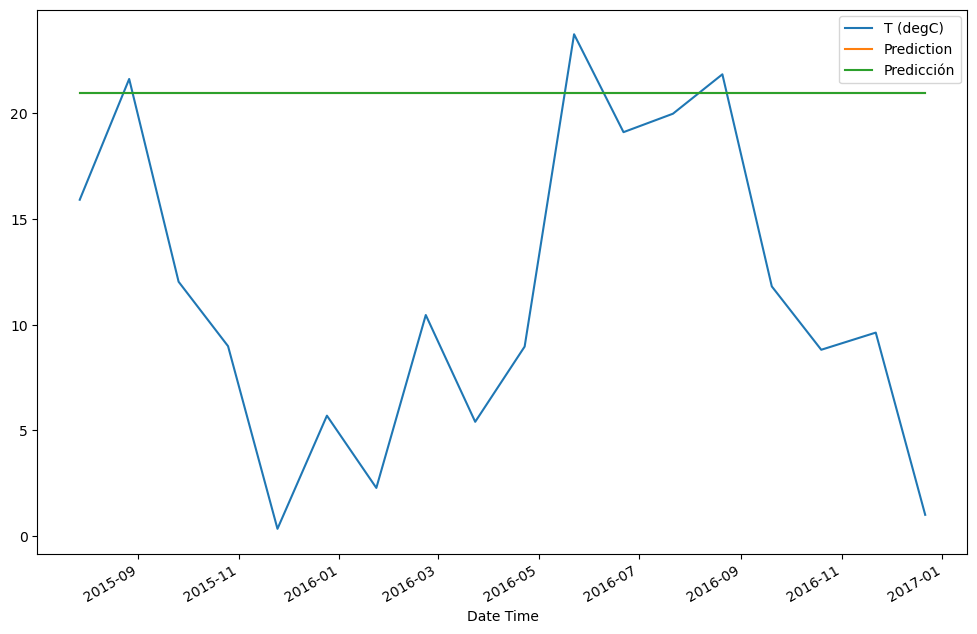

In [114]:
test.plot(figsize=(12,8))

In [115]:
from sklearn.metrics import mean_squared_error

In [116]:
np.sqrt(mean_squared_error(test['T (degC)'],test['Prediction']))

11.813721130009235

In [117]:
full_scaler = MinMaxScaler()
scaled_full_data = full_scaler.fit_transform(df)

In [118]:
lenght = 12
batch_size = 1
generator = TimeseriesGenerator(scaled_full_data, scaled_full_data, length=lenght, batch_size=batch_size)

In [120]:
model = Sequential()
model.add(LSTM(150, activation='relu', input_shape=(lenght, variables)))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mse')
model.fit(generator,epochs=15)

Epoch 1/15


C:\Users\MaríaQueraltSosaMomp\anaconda3\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


86/86 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - loss: 0.1539
Epoch 2/15
86/86 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0477
Epoch 3/15
86/86 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0559
Epoch 4/15
86/86 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0388
Epoch 5/15
86/86 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0267
Epoch 6/15
86/86 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0278
Epoch 7/15
86/86 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0338
Epoch 8/15
86/86 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0257
Epoch 9/15
86/86 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0235
Epoch 10/15
86/86 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.0204
Epoch 11/15
86/86 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0206
Epoch 12/15
86/86 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0243
Epoch 13/15
86/86 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0175
Epoch 14/15
86/86 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0163
Epoch 15/15
86/86 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0222


In [121]:
forecast = []
periods = 36 
first_batch = scaled_full_data[-lenght:]
actual_batch = first_batch.reshape((1, lenght, variables))
for i in range(periods):
    actual_pred = model.predict(actual_batch)[0]
    forecast.append(actual_pred) 
    actual_batch = np.append(actual_batch[:,1:,:],[[actual_pred]],axis=1)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 198ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━

In [122]:
forecast = scaler.inverse_transform(forecast)

In [123]:
df

,T (degC)
Date Time,
2009-01-01 00:10:00,-8.02
2009-01-31 00:10:00,-2.50
2009-03-02 00:10:00,3.60
2009-04-01 00:10:00,3.05
2009-05-01 00:10:00,9.66
...,...
2016-08-20 10:10:00,21.81
2016-09-19 10:10:00,11.80
2016-10-19 10:10:00,8.81


In [124]:
forecast_index = pd.date_range(start='2017-01-20',periods=periods,freq='MS')

In [125]:
forecast_df = pd.DataFrame(data=forecast,index=forecast_index,
                           columns=['Forecast'])

In [126]:
forecast_df

,Forecast
2017-02-01,4.270392
2017-03-01,4.733237
2017-04-01,5.464525
2017-05-01,8.494836
2017-06-01,11.567157
2017-07-01,11.291091
2017-08-01,12.623651
2017-09-01,9.952436
2017-10-01,5.908756
2017-11-01,4.914043


<Axes: >

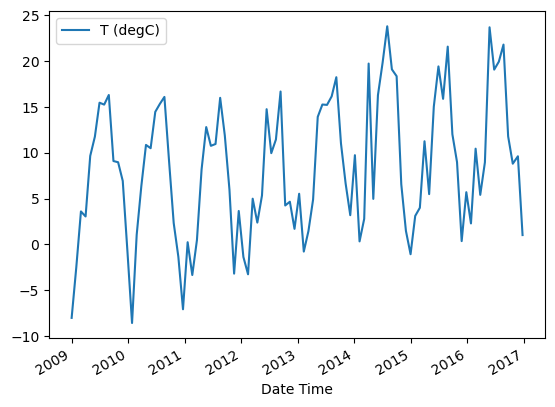

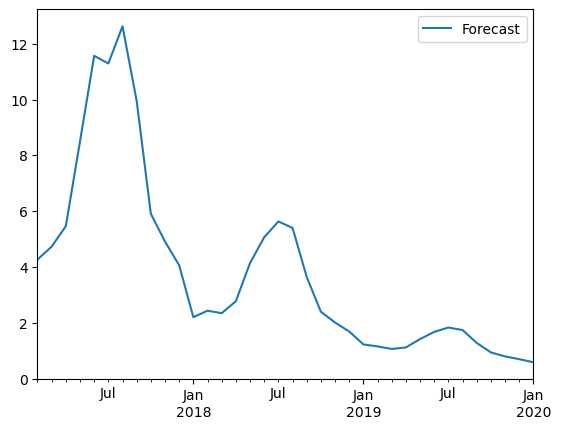

In [127]:
df.plot()
forecast_df.plot()

<Axes: xlabel='Date Time'>

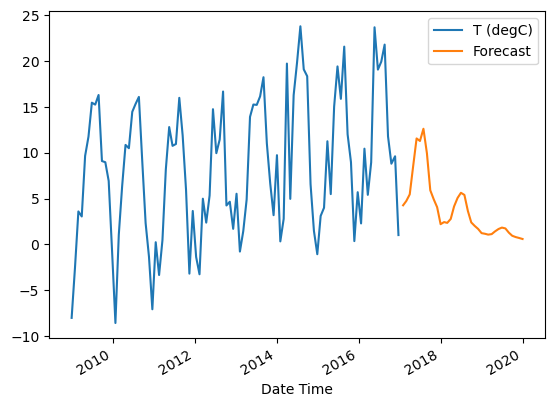

In [128]:
ax = df.plot()
forecast_df.plot(ax=ax)

(16801.0, 18262.0)

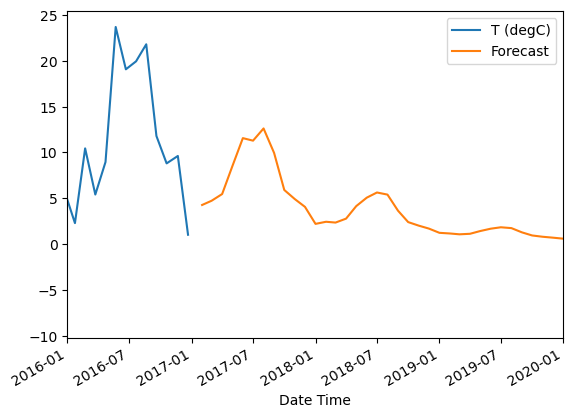

In [129]:
ax = df.plot()
forecast_df.plot(ax=ax)
plt.xlim('2016-01-01','2020-01-01')

In [130]:
from tensorflow.keras.models import load_model
model.save("Forecast_model.keras")